<a href="https://colab.research.google.com/github/talkin24/GradientBoosting/blob/main/Ch7_XGBoost_exoplanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/MyDrive/GradientBoosting

Mounted at /content/drive
/content/drive/MyDrive/GradientBoosting


In [2]:
import pandas as pd
df = pd.read_csv('./exoplanets.csv', nrows=400)
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [3]:
df['LABEL'].value_counts()

1    363
2     37
Name: LABEL, dtype: int64

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [5]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [6]:
def light_plot(index):
  y_vals = X.iloc[index]
  x_vals = np.arange(len(y_vals))
  plt.figure(figsize=(15,8))
  plt.xlabel('Number of Observations')
  plt.ylabel('Light Flux')
  plt.title('Light Plot' + str(index), size=15)
  plt.plot(x_vals, y_vals)
  plt.show()

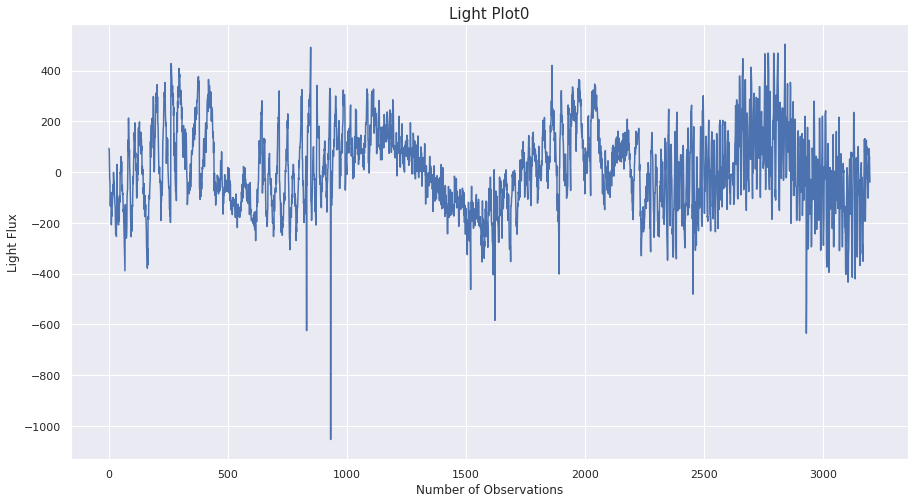

In [7]:
light_plot(0)

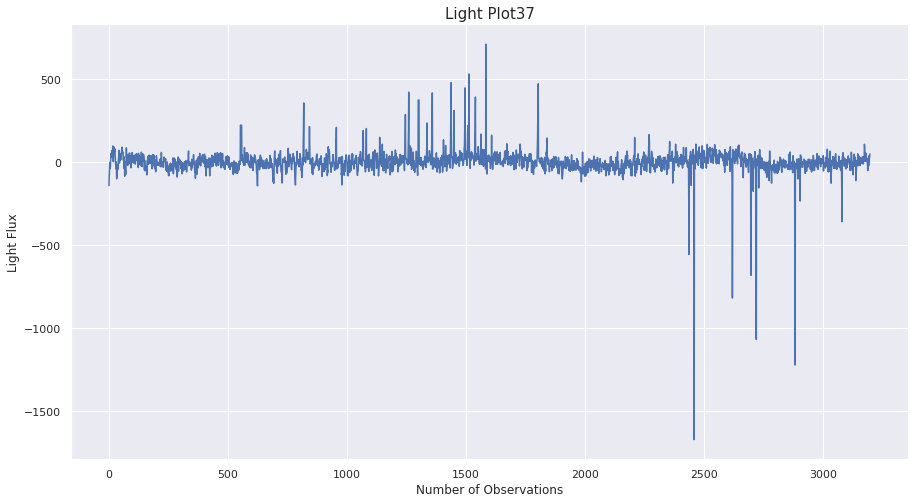

In [8]:
light_plot(37)

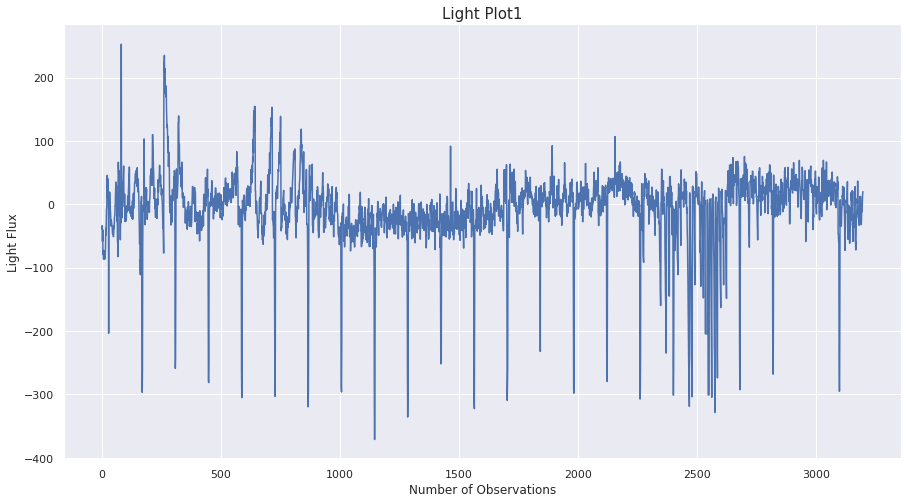

In [11]:
light_plot(1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 9.8 MB


In [13]:
df.isnull().sum().sum()

0

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [17]:
model = XGBClassifier(booster='gbtree')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('score:', str(score))

score: 0.88


In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_test, y_pred)

array([[86,  2],
       [10,  2]])

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.98      0.93        88
           2       0.50      0.17      0.25        12

    accuracy                           0.88       100
   macro avg       0.70      0.57      0.59       100
weighted avg       0.85      0.88      0.85       100



In [22]:
from sklearn.metrics import recall_score

In [23]:
recall_score(y_test, y_pred, pos_label=2)

0.16666666666666666

In [27]:
def xgb_clf(model, nrows):
  df = pd.read_csv('./exoplanets.csv', nrows=nrows)
  X = df.iloc[:, 1:]
  y = df.iloc[:, 0]
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score = recall_score(y_test, y_pred, pos_label=2)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  return score

In [28]:
xgb_clf(XGBClassifier(), nrows=800)

[[190   0]
 [  9   1]]
              precision    recall  f1-score   support

           1       0.95      1.00      0.98       190
           2       1.00      0.10      0.18        10

    accuracy                           0.95       200
   macro avg       0.98      0.55      0.58       200
weighted avg       0.96      0.95      0.94       200



0.1

In [29]:
xgb_clf(XGBClassifier(), nrows=400)

[[86  2]
 [10  2]]
              precision    recall  f1-score   support

           1       0.90      0.98      0.93        88
           2       0.50      0.17      0.25        12

    accuracy                           0.88       100
   macro avg       0.70      0.57      0.59       100
weighted avg       0.85      0.88      0.85       100



0.16666666666666666

In [31]:
xgb_clf(XGBClassifier(), nrows=200)

[[36  1]
 [ 8  5]]
              precision    recall  f1-score   support

           1       0.82      0.97      0.89        37
           2       0.83      0.38      0.53        13

    accuracy                           0.82        50
   macro avg       0.83      0.68      0.71        50
weighted avg       0.82      0.82      0.79        50



0.38461538461538464

In [32]:
xgb_clf(XGBClassifier(), nrows=74)

[[6 2]
 [3 8]]
              precision    recall  f1-score   support

           1       0.67      0.75      0.71         8
           2       0.80      0.73      0.76        11

    accuracy                           0.74        19
   macro avg       0.73      0.74      0.73        19
weighted avg       0.74      0.74      0.74        19



0.7272727272727273

In [33]:
df_train = pd.merge(y_train, X_train, left_index=True, right_index=True)

In [35]:
df_train[df_train['LABEL']==2].values

array([[ 2.0000e+00,  3.1290e+01,  2.5140e+01, ..., -1.7580e+01,
         1.3790e+01,  7.2000e-01],
       [ 2.0000e+00,  2.2820e+01,  4.6370e+01, ..., -5.5860e+01,
        -4.4550e+01, -1.6800e+01],
       [ 2.0000e+00,  1.1881e+02,  1.1097e+02, ...,  4.3295e+02,
         7.2181e+02,  9.3808e+02],
       ...,
       [ 2.0000e+00,  4.3070e+01,  4.6730e+01, ...,  1.8180e+01,
         5.1210e+01,  9.7100e+00],
       [ 2.0000e+00, -4.8480e+01, -2.2950e+01, ...,  2.1430e+01,
         1.4530e+02,  1.9720e+02],
       [ 2.0000e+00,  3.5920e+01,  4.5840e+01, ...,  3.7320e+01,
         3.6010e+01,  7.1590e+01]])

In [36]:
new_df = pd.DataFrame(np.repeat(df_train[df_train['LABEL']==2].values, 9, axis=0))

In [37]:
new_df.columns = df_train.columns

In [39]:
df_train_resample = pd.concat([df_train, new_df])

In [40]:
df_train_resample['LABEL'].value_counts()

1.0    275
2.0    250
Name: LABEL, dtype: int64

In [41]:
X_train_resample = df_train_resample.iloc[:, 1:]
y_train_resample = df_train_resample.iloc[:, 0]

In [42]:
model = XGBClassifier()
model.fit(X_train_resample, y_train_resample)
y_pred = model.predict(X_test)
score = recall_score(y_test, y_pred, pos_label=2)

In [43]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(score)

[[87  1]
 [ 8  4]]
              precision    recall  f1-score   support

           1       0.92      0.99      0.95        88
           2       0.80      0.33      0.47        12

    accuracy                           0.91       100
   macro avg       0.86      0.66      0.71       100
weighted avg       0.90      0.91      0.89       100

0.3333333333333333
